In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (25,10)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import category_encoders as ce
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge

TODO
- try Boruta feature selection  https://www.youtube.com/watch?v=hCwTDTdYirg
- https://www.youtube.com/watch?v=i-MF3CXWWEM&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=4 mutual exclusion for regression
- https://www.youtube.com/watch?v=FndwYNcVe0U&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=2 pearson

In [2]:
# load dataset
dataset = pd.read_csv('dataset/spotify_tracks.csv')
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Dividing features in <span style="color:blue">**NUMERICAL**</span> and <span style="color:red">**CATEGORICAL**</span> ones :

- <span style="color:red"> ***track_id***</span>: The Spotify ID for the track 

- <span style="color:red">***artists***</span>: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

- <span style="color:red">***album_name***</span>: The album name in which the track appears

- <span style="color:red">***track_name***</span>: Name of the track

- <span style="color:blue">***popularity***</span>: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

- <span style="color:blue">***duration_ms***</span>: The track length in milliseconds

- <span style="color:red">***explicit***</span>: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

- <span style="color:blue">***danceability***</span>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

- <span style="color:blue">***energy***</span>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
 
- <span style="color:red">***key***</span>: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
    
- <span style="color:blue">***loudness***</span>: The overall loudness of a track in decibels (dB)

- <span style="color:red">***mode***</span>: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
    
- <span style="color:blue">***speechiness***</span>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
    
- <span style="color:blue">***acousticness***</span>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
    
- <span style="color:blue">***instrumentalness***</span>: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
    
- <span style="color:blue">***liveness***</span>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
    
- <span style="color:blue">***valence***</span>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
    
- <span style="color:blue">***tempo***</span>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
    
- <span style="color:red">***time_signature***</span>: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
    
- <span style="color:red">***track_genre***</span>: The genre in which the track belongs

### **Preprocessing**

In [3]:
# dataset.isnull().sum() # to check if there are missing values

# drop records with missing values
dataset.dropna(inplace=True)

In [4]:
dataset.nunique(axis=0) # to check the number of distinct values for each column

Unnamed: 0          113999
track_id             89740
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50696
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45652
time_signature           5
track_genre            114
dtype: int64

In [5]:
X = dataset.drop(columns=['Unnamed: 0', 'track_id', 'popularity'])  # features
y = dataset['popularity']                                           # target variable

In [6]:
#np.array(X.groupby(['artists']).size().sort_values())
#print(X['artists'].unique())

#### Feature encoding

***explicit*** is a binary categorical feature that we map in {0,1}

In [7]:
X['explicit'] = X['explicit'].map({False : 0, True : 1})

***key***, ***time_signature*** and ***track_genre*** are categorical features with a restricted number of distinct values on which we apply one-hot encoding

In [8]:
ohe = ce.OneHotEncoder(cols=['key','time_signature', 'track_genre']) 
X = ohe.fit_transform(X)

***artists***, ***album_name*** and ***track_name*** are categorical features with a large number of distinct values on which we apply binary encoding

In [9]:
be = ce.BinaryEncoder(cols=['artists', 'album_name', 'track_name'])
X = be.fit_transform(X)

In [10]:
X.shape, X.columns

((113999, 191),
 Index(['artists_0', 'artists_1', 'artists_2', 'artists_3', 'artists_4',
        'artists_5', 'artists_6', 'artists_7', 'artists_8', 'artists_9',
        ...
        'track_genre_105', 'track_genre_106', 'track_genre_107',
        'track_genre_108', 'track_genre_109', 'track_genre_110',
        'track_genre_111', 'track_genre_112', 'track_genre_113',
        'track_genre_114'],
       dtype='object', length=191))

We split data in training and test set and we standardize them

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) #stratify=y)

In [12]:
standard_scaler = preprocessing.StandardScaler().set_output(transform="pandas")

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

# should I standardize also the target variable? boh, I don't think it's mandatory

### **Ridge Regression implementation**

In [13]:
class RidgeRegression:

    def __init__(self, λ = 1.0):
        self.λ = λ
        self.w = None

    def fit(self, X, y):
        
        # insert dummy feature
        X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
        
        I = np.identity(X.shape[1])
        I[0][0] = 0                         # justify this line

        self.w = np.linalg.inv(X.T @ X + self.λ * I) @ X.T @ y


    def predict(self, X):

        if self.w is None:
            raise RuntimeError('Model is still to fit')
        
        # insert dummy feature
        X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) 

        return X @ self.w
    
    def get_params(self, deep=True):
        return {"λ": self.λ}

### **Ridge Regression test considering both numerical and categorical features**

In [14]:
x = []
y = []

for λ in np.linspace(0.0, 200.0, num=40, endpoint=False):
    print()
    scores = cross_val_score(RidgeRegression(λ), 
                             X_train, 
                             y_train, 
                             scoring='neg_mean_squared_error', 
                             cv=5)
    x.append(λ)
    y.append(np.mean(scores))

best_λ = x[y.index(max(y))]
best_λ

60.0

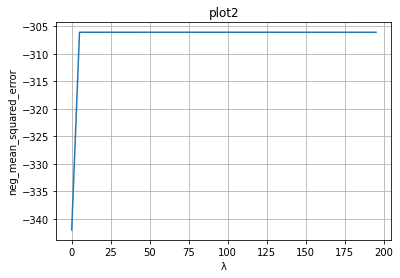

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='λ', ylabel='neg_mean_squared_error',
       title='plot2')
ax.grid()

plt.show()

In [16]:
rr = RidgeRegression(best_λ)
rr.fit(X_train.values, y_train.values)
y_prediction = rr.predict(X_test.values)

mean_squared_error(y_prediction, y_test)

302.3719810382896

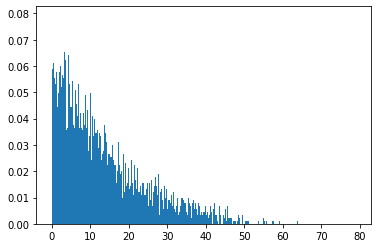

In [17]:
fig, ax = plt.subplots()
ax.hist(np.abs(y_prediction - y_test), density=True, bins=2000)
plt.show()

Checking that my implementation performs exactly as the one in *sklearn*

In [18]:
learner = GridSearchCV(estimator=Ridge(), 
                       param_grid={'alpha': np.linspace(0.0, 200.0, num=40, endpoint=False)}, 
                       cv=5, 
                       scoring='neg_mean_squared_error', 
                       return_train_score=True)
learner.fit(X_train, y_train)

learner.best_estimator_.fit(X_train, y_train)
y_prediction = learner.best_estimator_.predict(X_test)

print(learner.best_params_)
print(mean_squared_error(y_prediction, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.58118e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.87821e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 60.0}
302.37198103828473
